In [2]:
import json
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import tqdm
from matplotlib import pyplot as plt 

In [87]:
train = pd.read_csv("../Datasets/LitCovid/BC7-LitCovid-Train.csv")
dev = pd.read_csv("../Datasets/LitCovid/BC7-LitCovid-Dev.csv")
test = pd.read_csv("../Datasets/LitCovid/BC7-LitCovid-Test.csv")

In [71]:
print("Train size:", len(train))
print("Dev size:", len(dev))
print("Test size:", len(test))

Train size: 24960
Dev size: 6239
Test size: 2500


# Label Statistics

In [19]:
train_labels = train["label"].to_list()
train_labels = [label_set.split(";") for label_set in train_labels]
dev_labels = dev["label"].to_list()
dev_labels = [label_set.split(";") for label_set in dev_labels]

In [25]:
print("Train Average labels per example: ", np.mean([len(label_set) for label_set in train_labels]))
print("Train Standard dev labels per example: ", np.std([len(label_set) for label_set in train_labels]))
print("Test Average labels per example: ", np.mean([len(label_set) for label_set in test_labels]))
print("Test Standard dev labels per example: ", np.std([len(label_set) for label_set in test_labels]))

Train Average labels per example:  1.3720352564102565
Train Standard dev labels per example:  0.5829192878888834
Test Average labels per example:  1.3633595127424267
Test Standard dev labels per example:  0.563809994010852


In [40]:
frequencies = Counter(c for clist in train_labels for c in clist)

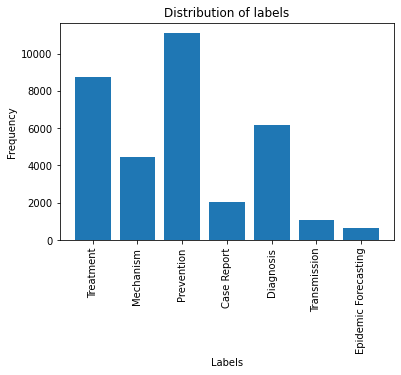

In [60]:
plt.bar(x=frequencies.keys(), height=frequencies.values())
plt.title("Distribution of labels")
plt.xlabel("Labels")
plt.xticks(range(7), frequencies.keys(), rotation='vertical')
plt.ylabel("Frequency")
plt.show()

# Corpus Statistics

In [61]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kgiantsios/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
def calc_stats(df, mode):
    text_words = []
    text_sentences = []
    for title, abstract in tqdm.tqdm(zip(df["title"].to_list(), df["abstract"].to_list())):
        text = str(title) + " " + str(abstract)
        text_words.append(len(text.split()))
        text_sentences.append(len(sent_tokenize(text)))
                              
    mean_text_words = np.mean(text_words)
    sd_text_words = np.std(text_words)
    mean_text_sentences = np.mean(text_sentences)
    print(mode + ' average words per text:', mean_text_words)
    print(mode + ' standard deviation on words per text:', sd_text_words)
    print(mode + ' average sentences per text:', mean_text_sentences)
    
    plt.hist(text_words, bins = 100)
    plt.show()

24960it [00:13, 1850.14it/s]


train average words per text: 212.70877403846154
train standard deviation on words per text: 91.87124100074108
train average sentences per text: 9.79266826923077


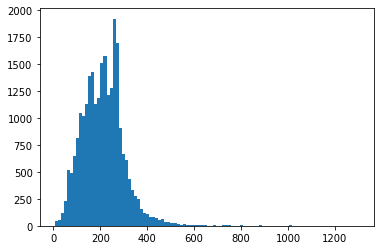

In [79]:
calc_stats(train, "train")

6239it [00:03, 1849.87it/s]


dev average words per text: 214.89838115082546
dev standard deviation on words per text: 94.56847740320373
dev average sentences per text: 9.90030453598333


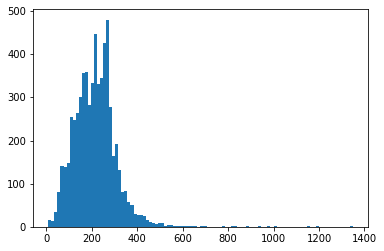

In [81]:
calc_stats(dev, "dev")

2500it [00:01, 1679.62it/s]


test average words per text: 226.6792
test standard deviation on words per text: 80.68011085366702
test average sentences per text: 10.488


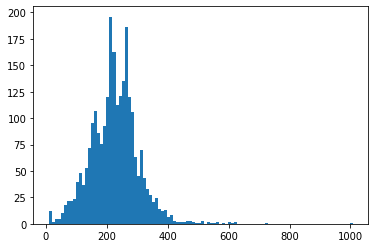

In [86]:
calc_stats(test, "test")